<h1 align="center">Statistical Inference 2, Demo 4</h1>

<br>

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

<h3 allign="left">Task 1</h3>

Let's examine a situation where the number of independent tests is *m* and the null hypothesis is valid in all tests. What is the probability that in at least one test, a p-value smaller than 0.05 is observed when...

a) no multiple testing correction is used \
b) Bonferroni correction is used

Draw the graphs of the probabilities of parts a) and b) on the same chart for $\, m = 1,2,...,100. \,$

**Solution (a):**

The significance level $\, \alpha \,$ directly corresponds to the probability of observing a p-value less than $\, \alpha \,$ purely by chance, even when the null hypothesis is true (i.e., when there is actually no effect). Therefore, if the null hypothesis is true for a given test, the probability of obtaining a p-value less than $\, \alpha \,$ (and thus incorrectly concluding that there is a significant effect) is $\, \alpha. \,$


The probability that a p-value greater than 0.05 is obtained is $\, (1 - 0.05) = 0.95. \,$

Since the tests are independent, the probability that **none** of the tests show a p-value smaller than 0.05 is $\, (1 - 0.05)^m. \,$

By the complement rule, the probability that at least one of the tests show a p-value smaller than 0.05 is $\, 1 - (1 - 0.05)^m \,$

In [47]:
m = 100
1 - (1 - 0.05)**m

0.994079470779666

<br>

**Solution (b):**

The probability that atleast one of the tests show a p-value smaller than 0.05 using a [Bonferroni correction](https://en.wikipedia.org/wiki/Bonferroni_correction) is

\begin{align*}
    1 - \left(1 - \frac{0.05}{m} \right)^m
\end{align*}

In [48]:
1 - (1 - (0.05/m))**m

0.04878246975766576

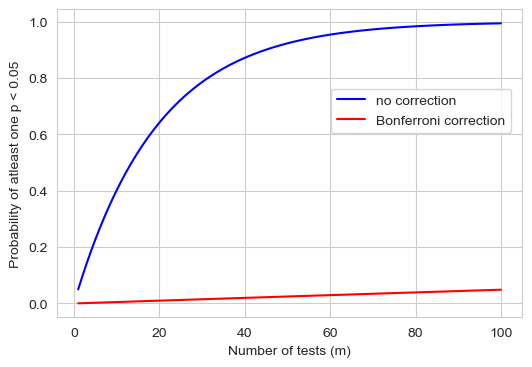

In [60]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
m_vals = np.arange(1, 101)
pr_no_correction = 1 - (1 - 0.05)**m_vals
pr_bonferroni_correction = 1 - (1 - (0.05/m))**m_vals

ax.plot(m_vals, pr_no_correction, label='no correction', color='blue')
ax.plot(m_vals, pr_bonferroni_correction, label='Bonferroni correction', color='red')
ax.set_ylabel('Probability of atleast one p < 0.05')
ax.set_xlabel('Number of tests (m)')
ax.legend(loc=(0.59, 0.6));

<br>

<br>

<h3 align="left">Task 2</h3>

Test statistic $\, Z_k \sim N(0,1), \,$ $\, k = 1,2,...,m, \,$ under the null hypothesis. Under the alternative hypothesis, $\, Z_k \sim N(3,1). \,$ The hypotheses are independent of each other. In a multiple testing situation, assume that the number of hypotheses being tested is $\, m = 100000 \,$ and $\, 0.1 \% \,$ of the cases are such that the alternative hypothesis is true. Initialize the random number generator with the R command *set.seed(2019)* and simulate this multiple testing situation. For the analysis, use...

a) a significance level of $\, \alpha = 0.05 \,$ and Bonferroni correction \
b) a false discovery rate of 20 %

Compare the results to the actual number of the alternative hypotheses.

**Solution (a):**

Since $\, m = 100 000 \,$ hypotheses are being tested, and for $\, 0.1 \% \,$ of them the alternative hypothesis is true, it means that $\, 100 000 * 0.001 = 100 \,$ hypotheses are true under the alternative hypothesis.

For the $\, H_0, \, 100 000 - 100 = 99 900 \,$ test statistics should be simulated from $\, N(0,1). \,$

For the $\, H_1, \,$ 100 test statistics should be simulated from $\, N(3,1). \,$

Since [Bonferroni correction](https://en.wikipedia.org/wiki/Bonferroni_correction) is to be used, the significance level $\, \alpha = 0.05 \,$ should be adjusted by dividing it by the number of hypotheses *m*.

The Bonferroni correction is a method used to control the **family-wise error rate (FWER).** \
The FWER is the probability of incorrectly rejecting at least one true $\, H_1, \,$ that is, making at least one *type I error* (false positive). The Bonferroni correction rejects the null hypothesis for each $\, p_i \le \large\frac{\alpha}{m}, \,$ thereby controlling the FWER at $\, \le \alpha. \,$

Since Python and R does not share the same random number generator (i.e., set.seed(2019) will produce different numbers in Python and R), the data was simulated in R in the following way:

$\quad \quad \quad \quad \quad \quad \quad \quad \quad \quad$ set.seed(2019) \
$\quad \quad \quad \quad \quad \quad \quad \quad \quad \quad$  m <- 100000 \
$\quad \quad \quad \quad \quad \quad \quad \quad \quad \quad$  m1 <- m * 0.001 \
$\quad \quad \quad \quad \quad \quad \quad \quad \quad \quad$  m0 <- m - m1 \
$\quad \quad \quad \quad \quad \quad \quad \quad \quad \quad$  z_null <- rnorm(m0, mean = 0, sd = 1) \
$\quad \quad \quad \quad \quad \quad \quad \quad \quad \quad$  z_alt <- rnorm(m1, mean = 3, sd = 1) \
$\quad \quad \quad \quad \quad \quad \quad \quad \quad \quad$  z_combined <- c(z_null, z_alt) \
$\quad \quad \quad \quad \quad \quad \quad \quad \quad \quad$  write.csv(z_combined, file = 'seed-2019.csv')

A p-value measures the probability of observing a test statistic as extreme as, or more extreme than, the value actually observed, under the assumption that the null hypothesis is true.

Simulating a dataset with a known proportion of true null and true alternative cases enables the evaluation of how different correction methods affect the balance between identifying true effects and controlling these error rates.

A z-score is a measure that describes a data point's position in terms of how many standard deviations it is from the mean of its distribution (i.e., a z-score indicates how many standard deviations the corresponding original score is from the original mean).

For example, a z-score of -2.5 indicates that the original score was 2.5 standard deviations below the original mean.

The [survival function](https://en.wikipedia.org/wiki/Survival_function)

\begin{align*}
    SF(x) = 1 - CDF(x)
\end{align*}

calculates the probability that a random variable takes a value greater than x. Therefore, using SF with z-scores gives a p-value for a right-tailed test, where we're interested in the probability of observing a test statistic as large as or larger than the observed value. This is particularly relevant if the alternative hypothesis posits that the true mean is greater than the null hypothesis mean (i.e., a right-tailed test), which is the case in the task at hand.

In [188]:
z = pd.read_csv('/Users/herrakaava/Documents/SI2/data-sets/seed-2019.csv', 
                index_col=0)

In [192]:
p_values = sp.stats.norm.sf(z)

In [194]:
# Significant p-values using a Bonferroni correction
m = 100000
a = 0.05
p_vals_significant_bonferroni = p_values < (a / m)
pd.Series(p_vals_significant_bonferroni.flatten()).value_counts()

False    99998
True         2
Name: count, dtype: int64

<br>

**Solution (b):**

In the *False Discovery Rate* (**FDR**) procedure, the desired proportion of false discoveries $\, q^* \,$ is first selected, after which the largest index *k* is found from the set of ordered p-values $\, p_{1} \le p_{2} \le \, ... \, \le p_{m}, \,$ for which it holds that

\begin{align*}
    p_{k} \le \frac{k}{m} \, q^*
\end{align*}

and the null hypotheses corresponding to the *k* smallest p-values are rejected. These are results of interest for further research, some of which are false discoveries such that the expected proportion of false discoveries is $\, q^*. \,$ For example, if $\, q^* = 0.2 \,$ has been selected, it can be expected that about 20% of the findings will be incorrect.

In [260]:
def FDR(q, p_vals):
    """
    Calculates the threshold below which p-values are rejected
    (i.e., the corresponding null hypotheses are rejected).
    
    Args:
        q: Expected proportion of false discoveries. For example, if q = 0.2,
           it is expected that about 20% of discoveries will be false.
        p_values: List of p-values.
        
    Returns:
        A list of p-values that are below the threshold 
        (and whose null hypotheses are thus rejected).
    """
    p_vals = np.array(p_vals)
    m = len(p_vals)
    p_vals_sorted = np.sort(p_vals)
    thresholds = [(k/m)*q for k in range(1, m+1)]
    
    # Find the largest k where p_{k} <= (k/m)*q
    k_largest = 0
    for k, (p, threshold) in enumerate(zip(p_vals_sorted, thresholds)):
        if p <= threshold:
            k_largest = k
         
    threshold_val = p_vals_sorted[k_largest]
    
    # Return the original p-values that are below the calculated threshold
    # as well as the threshold value.
    return p_vals[p_vals <= threshold_val], threshold_val

In [263]:
BH, threshold_value = FDR(0.2, p_values)

In [276]:
pd.Series(np.round(BH, 6))

0     0.000026
1     0.000070
2     0.000014
3     0.000119
4     0.000115
5     0.000134
6     0.000008
7     0.000044
8     0.000108
9     0.000022
10    0.000168
11    0.000034
12    0.000033
13    0.000128
14    0.000098
15    0.000035
16    0.000123
17    0.000024
18    0.000001
19    0.000138
20    0.000000
21    0.000016
22    0.000019
23    0.000072
24    0.000038
25    0.000106
26    0.000000
27    0.000043
28    0.000114
29    0.000047
30    0.000088
31    0.000107
32    0.000013
33    0.000082
34    0.000019
35    0.000039
36    0.000010
37    0.000002
38    0.000011
39    0.000170
dtype: float64

- The null hypotheses corresponding to these **40** smallest p-values are rejected.

In [271]:
threshold_value

array([0.00017007])

- This is the largest p-value that satisfies the equation

\begin{align*}
    p_{k} \le \frac{k}{m} \, q^*
\end{align*}

<br>

<br>

<h3 align="left">Task 3</h3>

We are investigating the prevalence of a disease in a population using a diagnostic test that gives a false positive result (i.e., in the situation where the person being tested does not have the disease, the test returns a positive result) with a probability of 0.04 and a false negative result (i.e., in the situation where the person being tested does have the disease, the test returns a negative result) with a probability of 0.15. In other words, the test's sensitivity is 1 − 0.15 = 0.85 and the test's specificity is 1 − 0.04 = 0.96. 1000 tests are conducted, and 100 positive test results are observed. Calculate the posterior expectation value for the number of disease carriers in the tested group of 1000 people, given the prior probability of the disease is...

a) $\, p_0 = 0.01 \,$ \
b) $\, p_1 = 0.1 \,$

**Solution:**

*Sensitivity:*
- Sensitivity (true positive rate) is the probability of a positive test result, conditioned on the individual truly being positive.

*Specificity:*
- Specificity (true negative rate) is the probability of a negative test result, conditioned on the individual truly being negative.

Let 

\begin{align*}
    \text{A} &= \text{"a person has the disease"} \\
    \text{B} &= \text{"a positive test result"}
\end{align*}

Now,

\begin{align*}
    P(A) &= 0.01 \quad (prior) \\
    P(B|A) & = 0.85 \quad (sensitivity) \\
    P(B^C|A^C) &= 0.96 \quad (specificity) \\
    P(B|A^C) &= 0.04 \quad (\text{false positive}) \\
    P(B^C|A) &= 0.15 \quad (\text{false negative})
\end{align*}

If we assume that the tests are independent of each other, the expected number of disease carriers in the group of 1000 tested people is

\begin{align*}
    E \, [\text{true positives}] &= P(A | B) \, * \, 1000 \\
    &= \frac{P(B|A) \, P(A)}{P(B)} \, * \, 1000
\end{align*}

In [2]:
def posterior_expectation(prior: float, sens: float, spes: float, n_pos: int) -> list[int]:
    """
    Calculates the expected value of true positives among people, 
    who got a positive test result.
    
    Args:
        prior: Prior probability.
        sens: Sensitivity of the test.
        spes: Specificity of the test.
        n_pos: The number of positive test results.
        
    Returns:
        The expected number of true positives among people,
        who got a positive test result.
    """
    FPR = 1 - spes
    posterior_prob = (sens * prior) / (sens * prior + FPR * (1 - prior))
    return posterior_prob * n_pos

**a)**

In [24]:
posterior_expectation(prior=0.01, sens=0.85, spes=0.96, n_pos=100)

17.67151767151766

**b)**

In [26]:
posterior_expectation(prior=0.1, sens=0.85, spes=0.96, n_pos=100)

70.24793388429751

<br>

<br>

<h3 align="left">Task 4</h3>

Simulate the data as follows:


$\quad \quad \quad \quad \quad \quad \quad \quad \quad \quad$ set.seed(20190109) \
$\quad \quad \quad \quad \quad \quad \quad \quad \quad \quad$  x <- rexp(45, rate=1.6) 

Estimate the exponential distribution parameter $\, \theta \,$ (the inverse of the mean) using the maximum likelihood method, and test the null hypothesis $\, \theta = 1.2 \,$ with...

a) The likelihood ratio test \
b) The Wald's test \
c) The Rao's score test

Use the asymptotic distributions of the test statistics.

In [190]:
x = pd.read_csv("/Users/herrakaava/Documents/SI2/simulated-data-R/random-exp.csv",
                index_col=0).values

**Solution (a):**

The likelihood ratio test is based on the comparison of the values $\, L(\hat\theta) \,$ and $\, L(\theta_0), \,$ where
- $\, L(\hat\theta) \,$ is the likelihood of the observed data given the parameter estimate $\, \hat\theta, \,$ where $\, \hat\theta \,$ is estimated using the MLE method.
- $\, L(\theta_0) \,$ is the likelihood of the observed data under the null hypothesis $\, (\text{i.e.,} \, \, \theta$ is equal to some specific value $\, \theta_0). \,$

The likelihood ratio itself is a ratio of these two likelihoods:

\begin{align*}
    L_R(\theta) = \frac{L(\theta)}{L(\hat\theta)}.
\end{align*}

The test statistic is given by

\begin{align*}
    D = -2[l(\theta_0 - l(\hat\theta)].
\end{align*}

Given the null hypothesis $\, \theta = \theta_0, \,$ the test statistic $\, D \sim \chi^2(1) \,$ (asymptotic distribution).

Let $\, X_1,...,X_n \sim Exp(\theta). \,$ Assume that $\, X_1,...,X_n \,$ are i.i.d.

Now, the pdf is

\begin{align*}
    \large f(x) = \large\theta e^{-\theta x}
\end{align*}

from which it follows that the likelihood is

\begin{align*}
    \large L(\theta) &= \large\prod_{i=1}^{n}\theta e^{-\theta x_i} \\
    \large L(\theta) &= \large\theta^n \, e^{-\theta\sum_{i=1}^{n} x_i}
\end{align*}

and the logarithmic likelihood is

\begin{align*}
    \large l(\theta) &= \large log(L(\theta)) \\
    &= \large n \, log(\theta) - \theta \displaystyle \sum_{i=1}^{n} x_i \\
    &= \large n \, log(\theta) - \theta \, n \, \bar{x}
\end{align*}

The score function is

\begin{align*}
    \large \frac{d \, l(\theta)}{d \, \theta} & = \large\frac{n}{\theta} - n \, \bar{x}
\end{align*}

and the MLE for $\, \theta \,$ is

\begin{align*}
    \large\frac{n}{\theta} - n \, \bar{x} &= \large 0 \\
    \large \hat{\theta} &= \large\frac{1}{\bar{x}}
\end{align*}

The observed test statistic:

\begin{align*}
    D_{obs} &= -2 \, [l(1.2) - l(\hat\theta] \\
    &= -2 \, \left[(n \, log(1.2) - 1.2 \, n \, \bar{x}) - \left(n \, log \left(\frac{1}{\bar{x}} \right) - \frac{1}{\bar{x}} \, n \, \bar{x} \right) \right]
\end{align*}

In [191]:
n = len(x)
x_mean = np.mean(x)
theta_hat = 1 / x_mean
theta0 = 1.2
print(f'The MLE for theta, given the data, is: {theta_hat}')

The MLE for theta, given the data, is: 1.7134823819491094


In [192]:
l_theta0 = n * np.log(theta0) - theta0 * n * x_mean
l_theta_hat = n * np.log(theta_hat) - theta_hat * n * x_mean
D_obs = -2 * (l_theta0 - l_theta_hat)
p_val_D = sp.stats.chi2.sf(D_obs, 1)

In [193]:
print(f'The observed test statistic is: {D_obs}')
print(f'The p-value is: {p_value}')

The observed test statistic is: 5.088096426307104
The p-value is: 0.024090621150521352


- Given the small p-value, there is evidence against the $\, H_0 \,$

$\, \quad\quad\rightarrow \,$ The data at hand does not agree with $\, \theta = 1.2 \,$ (the null hypothesis)

<br>

**Solution (b):**

The test statistic for [Wald's test](https://en.wikipedia.org/wiki/Wald_test) and its asymptotic distribution:

\begin{align*}
    W = (\hat\theta - \theta_0)^T \, J(\hat\theta) \, (\hat\theta - \theta_0) \quad \sim \chi^2(p),
\end{align*}

where *p* is the number of parameters being tested.

For the Fisher information, calculate the second derivate of the logarithmic likelihood.


$l(\theta) = n \, log(\theta) - \theta \, n \, \bar{x}$


$\large\frac{d \, l(\theta)}{d \, \theta} = \frac{n}{\theta} - n \, \bar{x}$


$\large\frac{d^2 \, l(\theta)}{d \theta^2} = - \frac{n}{\theta^2}$


The Fisher information is:

\begin{align*}
    J(\theta) &= \boldsymbol{E} \left(-\frac{d^2 \, l(\theta)}{d \theta^2} \right) \\
    &= \boldsymbol{E}\left(\frac{n}{\theta^2} \right) \\
    &= \frac{n}{\theta^2}
\end{align*}

- Fisher information is the expected value of the observed information.
- The observed information is calculated from the data that is actually observed, and it is defined as the (negative) second derivative of the log-likelihood function with respect to the parameter(s) of interest.
- If The observed information does not depend on the observations $\, x_i, \,$ Fisher information = Observed information.

In [194]:
n = len(x)
x_mean = np.mean(x)
theta_hat = 1 / x_mean
theta0 = 1.2
Fisher_info = n / theta_hat**2

In [195]:
W_obs = (theta_hat - theta0) * Fisher_info * (theta_hat - theta0)
p_val_W = sp.stats.chi2.sf(W_obs, 1)

In [197]:
print(f'The observed test statistic is: {W_obs}')
print(f'The p-value is: {p_Wald}')

The observed test statistic is: 4.041143955311276
The p-value is: 0.04440371257735858


- Given the small p-value, there is evidence against the $\, H_0 \,$

$\, \quad\quad\rightarrow \,$ The data at hand does not agree with $\, \theta = 1.2 \,$ (the null hypothesis)

<br>

**Solution (c):**

The test statistic for Rao's score test and its asymptotic distribution:

\begin{align*}
    S = V(\theta_0)^T \, J(\theta_0)^{-1} \, V(\theta_0) \quad \sim \chi^2(p),
\end{align*}

where V is the *score function*.

The score function is

\begin{align*}
    \frac{d \, l(\theta)}{d \, \theta} & = \frac{n}{\theta} - n \, \bar{x}
\end{align*}

In [198]:
n = len(x)
x_mean = np.mean(x)
theta_hat = 1 / x_mean
theta0 = 1.2
Fisher_info = n / theta_hat**2
Score = (n / theta0) - n * x_mean

In [199]:
S_obs = Score * (1 / Fisher_info) * Score
p_val_S = sp.stats.chi2.sf(S_obs, 1)

In [200]:
print(f'The observed test statistic is: {S_obs}')
print(f'The p-value is: {p_Rao}')

The observed test statistic is: 8.239504892879097
The p-value is: 0.00409883116912793


- Given the small p-value, there is evidence against the $\, H_0 \,$

$\, \quad\quad\rightarrow \,$ The data at hand does not agree with $\, \theta = 1.2 \,$ (the null hypothesis)

<br>

<br>

<h3 align="left">Task 5</h3>

Repeat task 4 by simulating the distributions of the test statistics instead of using the asymptotic distributions.

**Solution:**

In [211]:
num_simulations = 10000
sample_size = 45
theta0 = 1.2
D_sim = np.zeros(num_simulations)
W_sim = np.zeros(num_simulations)
S_sim = np.zeros(num_simulations)

for i in range(num_simulations):
    
    # Generate sample under H_0
    X = sp.stats.expon.rvs(scale=1/theta0, size=sample_size)
    
    # Estimate theta_hat using MLE for the simulated sample
    theta_hat = 1 / np.mean(X)
    
    # Caculculate log-likelihood for theta_hat and theta0
    ll_theta_hat = np.sum(sp.stats.expon.logpdf(x, scale=1/theta_hat))
    ll_theta0 = np.sum(sp.stats.expon.logpdf(x, scale=1/theta0))
    
    # Fisher info
    J = sample_size / theta_hat**2
    
    # Score function
    Score = (sample_size / theta0) - sample_size * np.mean(X)
    
    # Calculate the test statistics
    D_sim[i] = -2 * (ll_theta0 - ll_theta_hat)
    W_sim[i] = (theta_hat - theta0)**2 * J
    S_sim[i] = Score**2 * (1/J)  

In [212]:
# Compare the test statistic calculated from the observed data
# to the test statistics calculated from the simulated data.
# e.g., if the observed test statistic D is bigger than 99 %
# of the simulated test statistics, then the simulated p-value is p=0.01.

n = len(x)
x_mean = np.mean(x)
theta_hat = 1 / x_mean
theta0 = 1.2
Fisher_info = n / theta_hat**2
Score = (n / theta0) - n * x_mean
l_theta0 = n * np.log(theta0) - theta0 * n * x_mean
l_theta_hat = n * np.log(theta_hat) - theta_hat * n * x_mean

D_obs = -2 * (l_theta0 - l_theta_hat)
W_obs = (theta_hat - theta0) * Fisher_info * (theta_hat - theta0)
S_obs = Score * (1 / Fisher_info) * Score

p_val_D_sim = 1 - sum(D_obs >= D_sim) / (len(D_sim))
p_val_W_sim = np.mean(W_sim >= W_obs)
p_val_S_sim = np.mean(S_sim >= S_obs)

In [213]:
print(f'The simulated p-value associated with the likelihood ratio test: {p_val_D_sim}')
print(f"The simulated p-value associated with the Wald's test: {p_val_W_sim}")
print(f"The simulated p-value associated with the Rao's score test: {p_val_S_sim}")

The simulated p-value associated with the likelihood ratio test: 0.0
The simulated p-value associated with the Wald's test: 0.0429
The simulated p-value associated with the Rao's score test: 0.0153
